D:\VENV_PYTHON\py3_8\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


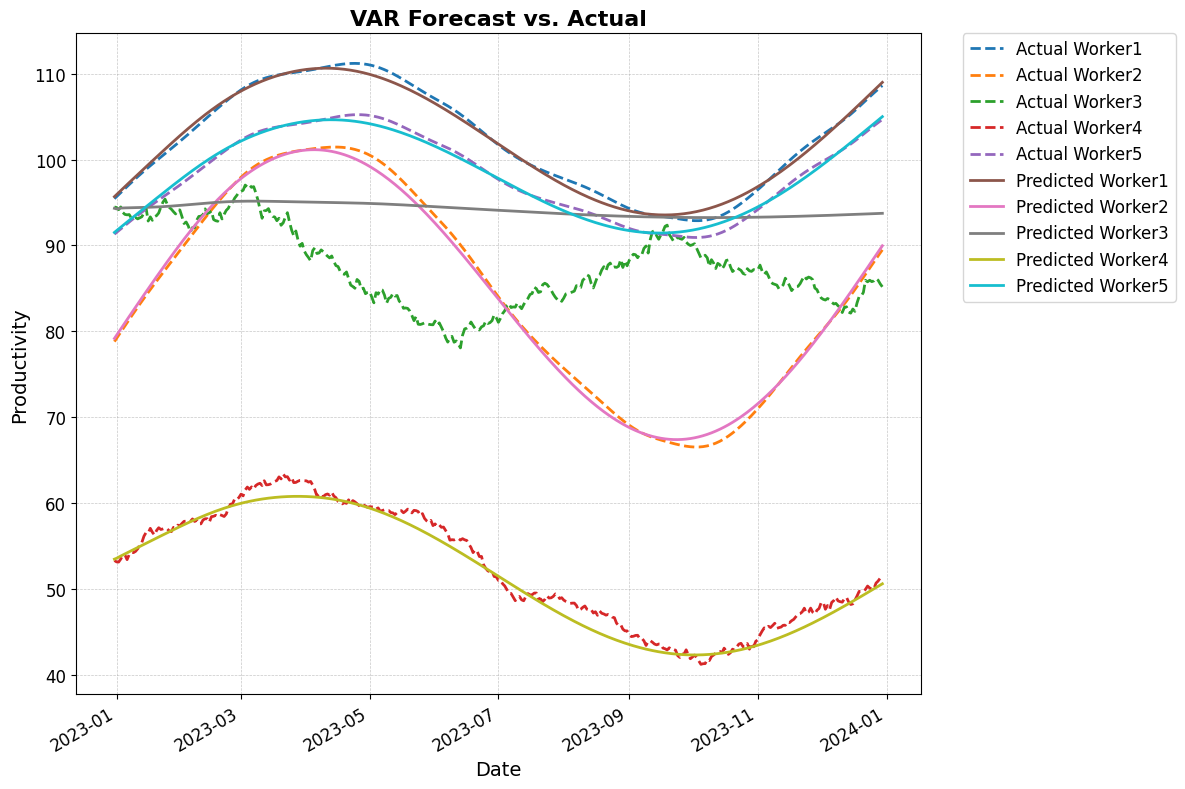

In [3]:
"""
Program: VAR Analysis and Prediction
Description: Analyze and predict worker productivity using Vector Autoregression (VAR).
Requirements: Install `statsmodels`, `numpy`, `pandas`, and `matplotlib` via pip.
"""

# Improved Plot for Publication
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import VAR

def load_data(file_path):
    """
    Load the synthetic worker productivity dataset from a CSV file.

    Parameters:
        file_path (str): Path to the CSV file containing the dataset.

    Returns:
        pd.DataFrame: A DataFrame containing the productivity data.
    """
    return pd.read_csv(file_path, index_col=0, parse_dates=True)


def split_data(data, train_end_date):
    """
    Split the dataset into training and testing sets based on a cutoff date.

    Parameters:
        data (pd.DataFrame): The complete dataset.
        train_end_date (str): The end date for the training set in 'YYYY-MM-DD' format.

    Returns:
        pd.DataFrame, pd.DataFrame: Training and testing datasets.
    """
    train_data = data.loc[:train_end_date]
    test_data = data.loc[train_end_date:]
    return train_data, test_data


def fit_var_model(train_data, max_lags=5):
    """
    Fit a VAR model to the training dataset.

    Parameters:
        train_data (pd.DataFrame): The training dataset.
        max_lags (int): Maximum lag order for the VAR model.

    Returns:
        VARResults: Fitted VAR model.
    """
    model = VAR(train_data)
    results = model.fit(maxlags=max_lags)
    return results


def forecast_and_evaluate(model, train_data, test_data):
    """
    Forecast and evaluate the VAR model on the test dataset.

    Parameters:
        model (VARResults): The fitted VAR model.
        train_data (pd.DataFrame): The training dataset.
        test_data (pd.DataFrame): The testing dataset.

    Returns:
        pd.DataFrame, float: Predicted values and RMSE.
    """
    forecast = model.forecast(train_data.values[-model.k_ar :], steps=len(test_data))
    forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_data, forecast_df))
    return forecast_df, rmse

if __name__ == "__main__":
    
    # Load the synthetic dataset
    data = load_data("synthetic_worker_productivity.csv")
    
    # Split into training (first 2 years) and testing (last year)
    train_data, test_data = split_data(data, "2022-12-31")
    
    # Fit VAR model
    var_model = fit_var_model(train_data)
    
    # Forecast and evaluate
    predictions, error = forecast_and_evaluate(var_model, train_data, test_data)
    
    plt.figure(figsize=(12, 8))
    
    # Plot test data (actual values)
    for col in test_data.columns:
        plt.plot(test_data.index, test_data[col], label=f"Actual {col}", linestyle="--", linewidth=2)
    
    # Plot predictions
    for col in predictions.columns:
        plt.plot(predictions.index, predictions[col], label=f"Predicted {col}", linewidth=2)
    
    # Add labels, title, and grid
    plt.title("VAR Forecast vs. Actual", fontsize=16, fontweight='bold')
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Productivity", fontsize=14)
    plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.7)
    
    # Format x-axis for dates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.gcf().autofmt_xdate()  # Rotate date labels
    
    # Enhance tick parameters
    plt.tick_params(axis="both", which="major", labelsize=12)
    
    # Add legend outside the plot
    plt.legend(fontsize=12, loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    
    # Adjust layout and save
    plt.tight_layout()
    plt.show()


Evaluation Metrics:
RMSE: 1.02
MAE: 0.77
MAPE: 3.93


D:\VENV_PYTHON\py3_8\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


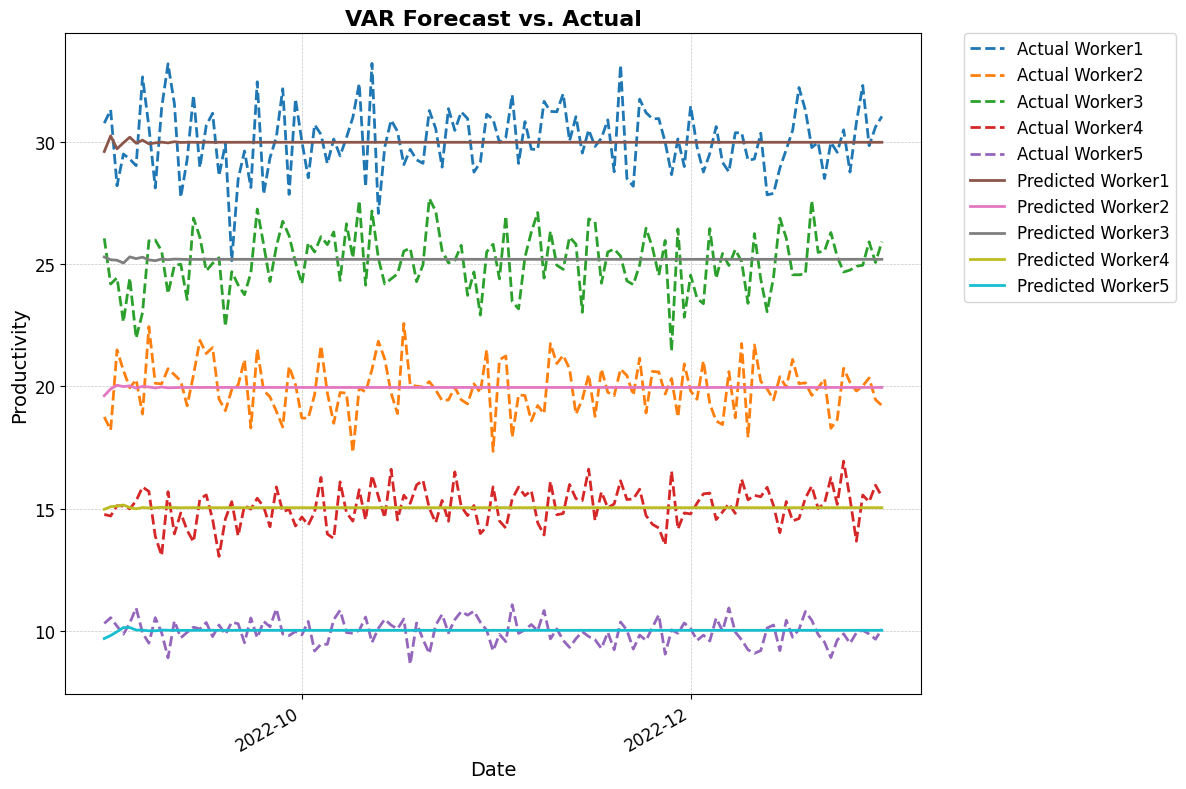

In [20]:
"""
Program: VAR Analysis and Prediction with Evaluation Metrics
Description: Analyze and predict worker productivity using Vector Autoregression (VAR), including evaluation metrics.
Requirements: Install `statsmodels`, `numpy`, `pandas`, and `matplotlib` via pip.
"""

# Improved Plot for Publication
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.api import VAR

def load_data(file_path):
    """
    Load the synthetic worker productivity dataset from a CSV file.

    Parameters:
        file_path (str): Path to the CSV file containing the dataset.

    Returns:
        pd.DataFrame: A DataFrame containing the productivity data.
    """
    return pd.read_csv(file_path, index_col=0, parse_dates=True)

def split_data(data, train_end_date):
    """
    Split the dataset into training and testing sets based on a cutoff date.

    Parameters:
        data (pd.DataFrame): The complete dataset.
        train_end_date (str): The end date for the training set in 'YYYY-MM-DD' format.

    Returns:
        pd.DataFrame, pd.DataFrame: Training and testing datasets.
    """
    train_data = data.loc[:train_end_date]
    test_data = data.loc[train_end_date:]
    return train_data, test_data

def fit_var_model(train_data, max_lags=5):
    """
    Fit a VAR model to the training dataset.

    Parameters:
        train_data (pd.DataFrame): The training dataset.
        max_lags (int): Maximum lag order for the VAR model.

    Returns:
        VARResults: Fitted VAR model.
    """
    model = VAR(train_data)
    results = model.fit(maxlags=max_lags)
    return results

def forecast_and_evaluate(model, train_data, test_data):
    """
    Forecast and evaluate the VAR model on the test dataset.

    Parameters:
        model (VARResults): The fitted VAR model.
        train_data (pd.DataFrame): The training dataset.
        test_data (pd.DataFrame): The testing dataset.

    Returns:
        pd.DataFrame, dict: Predicted values and evaluation metrics.
    """
    forecast = model.forecast(train_data.values[-model.k_ar:], steps=len(test_data))
    forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(test_data.values, forecast_df.values))
    mae = mean_absolute_error(test_data.values, forecast_df.values)
    mape = np.mean(np.abs((test_data.values - forecast_df.values) / np.where(test_data.values != 0, test_data.values, np.nan))) * 100

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "MAPE": np.nan_to_num(mape, nan=np.inf)  # Handle edge cases where division by zero occurs
    }
    return forecast_df, metrics

if __name__ == "__main__":

    # Load the synthetic dataset
    data = load_data("synthetic_validation_dataset.csv")

    # Split into training (first 2 years) and testing (last year)
    train_data, test_data = split_data(data, "2022-8-31")

    # Fit VAR model
    var_model = fit_var_model(train_data)

    # Forecast and evaluate
    predictions, metrics = forecast_and_evaluate(var_model, train_data, test_data)

    # Display metrics
    print("Evaluation Metrics:")
    for metric, value in metrics.items():
        if np.isinf(value):
            print(f"{metric}: Undefined (division by zero)")
        else:
            print(f"{metric}: {value:.2f}")

    plt.figure(figsize=(12, 8))

    # Plot test data (actual values)
    for col in test_data.columns:
        plt.plot(test_data.index, test_data[col], label=f"Actual {col}", linestyle="--", linewidth=2)

    # Plot predictions
    for col in predictions.columns:
        plt.plot(predictions.index, predictions[col], label=f"Predicted {col}", linewidth=2)

    # Add labels, title, and grid
    plt.title("VAR Forecast vs. Actual", fontsize=16, fontweight='bold')
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Productivity", fontsize=14)
    plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.7)

    # Format x-axis for dates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.gcf().autofmt_xdate()  # Rotate date labels

    # Enhance tick parameters
    plt.tick_params(axis="both", which="major", labelsize=12)

    # Add legend outside the plot
    plt.legend(fontsize=12, loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    # Adjust layout and save
    plt.tight_layout()
    plt.show()
